In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_excel('dataset.xlsx')
df.head()
df.tail()

,Tanggal,Komentar,Tweets,ID,Screen Name,Banyak Retweet,Source,Retweet Status,Hashtags
258,2021-05-13 12:56:03,0,b'Tapi berapa bulan dia yakin daerah itu akan ...,1.392826e+18,interncase,0.0,Twitter for Android,0.0,[]
259,2021-05-12 13:48:20,0,"b'Jika penebangan hutan terus dilakukan, maka ...",1.392477e+18,FreeHafis1,0.0,twittbot.net,0.0,[]
260,2021-05-11 21:53:13,0,b'RT @BNGPY: @sayfun_niam @SantorinisSun Dan i...,1.392236e+18,dmwsdq,4.0,Twitter for Android,1.0,[]
261,2021-05-11 16:32:19,0,b'RT @BNGPY: @sayfun_niam @SantorinisSun Dan i...,1.392156e+18,ddiannss,4.0,Twitter for iPhone,1.0,[]
262,2021-05-11 16:27:57,0,b'RT @BNGPY: @sayfun_niam @SantorinisSun Dan i...,1.392155e+18,kisbet_,4.0,Twitter for iPhone,1.0,[]


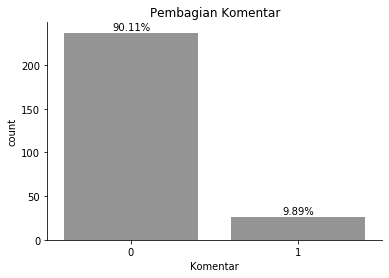

In [4]:
fig1 = sns.countplot(x='Komentar',data=df, color='#949494')
fig1.set_title('Pembagian Komentar')
total = float(len(df))
for p in fig1.patches:
    height = p.get_height()
    fig1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
sns.despine()

In [7]:
train = df[:int(len(df)*0.5)]
test = df[int(len(df)*0.5):-1]

In [8]:
print(len(train))
print(len(test))

131
131


In [9]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\Users\yusri\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yusri\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yusri\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yusri\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [10]:
data_tweet = train['Tweets']
data_tweet.head()

0                         b'@xiluxba penebangan hutan'
1    b'\xc2\xa9 misi yang harus ia emban. Apanya ya...
2    b'Jika penebangan hutan terus dilakukan, maka ...
3    b'Hampir separuh dari semua jenis flora, fauna...
4    b'\xe3\x80\x88 Penebangan liar, mungkin hal se...
Name: Tweets, dtype: object

In [11]:
token = Tokenizer()
token.fit_on_texts(train['Tweets'])
seq_data_tweet = token.texts_to_sequences(train['Tweets'])
enc_data_tweet = token.sequences_to_matrix(seq_data_tweet,mode="tfidf")

In [12]:
label = train['Komentar']

In [14]:
x_train = enc_data_tweet
y_train = label

In [15]:
token_test = Tokenizer()
token_test.fit_on_texts(test['Tweets'])
seq_data_tweet_test = token.texts_to_sequences(test['Tweets'])
enc_data_tweet_test = token.sequences_to_matrix(seq_data_tweet_test,mode="tfidf")

In [17]:
label_test = test['Komentar']

In [18]:
x_test = enc_data_tweet_test
y_test = label_test

In [20]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[112,   2],
       [ 10,   7]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       114
           1       0.78      0.41      0.54        17

    accuracy                           0.91       131
   macro avg       0.85      0.70      0.74       131
weighted avg       0.90      0.91      0.90       131

